# Nombre del proyecto : Prediccion de precios de Airbnb

---



Objetivo: Estimar precios posibles para un alquiler de Airbnb basandose en previa informacion de precios, resenas, habitaciones, distancias al metro y cetro civico, capacidad de personas y demas información.

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
#Base de datos extrida de la pagina kaggle

#https://www.kaggle.com/datasets/dipeshkhemani/airbnb-cleaned-europe-dataset

In [8]:
#@title **Load libs** { display-mode: "form" }
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV, train_test_split

import seaborn as sns
import sklearn

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.datasets import *
from sklearn.cluster import AgglomerativeClustering
sns.set_theme()

pd.__version__

'1.5.3'

In [11]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Proyecto/Aemf1.csv')
print(df.head(500))
df.describe()

          City       Price      Day        Room Type  Shared Room  \
0    Amsterdam  194.033698  Weekday     Private room        False   
1    Amsterdam  344.245776  Weekday     Private room        False   
2    Amsterdam  264.101422  Weekday     Private room        False   
3    Amsterdam  433.529398  Weekday     Private room        False   
4    Amsterdam  485.552926  Weekday     Private room        False   
..         ...         ...      ...              ...          ...   
495  Amsterdam  394.394582  Weekday  Entire home/apt        False   
496  Amsterdam  721.533522  Weekday  Entire home/apt        False   
497  Amsterdam  556.558011  Weekday     Private room        False   
498  Amsterdam  762.074380  Weekday     Private room        False   
499  Amsterdam  337.918590  Weekday     Private room        False   

     Private Room  Person Capacity  Superhost  Multiple Rooms  Business  \
0            True              2.0      False               1         0   
1            True    

,Price,Person Capacity,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
count,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000
mean,260.094423,3.237235,0.295273,0.341180,9.442274,93.103179,1.165939,2.679792,0.603921,293.905990,11.719658,626.692618,25.553590
std,279.408493,1.299459,0.456171,0.474112,0.889173,8.141745,0.638157,1.996684,0.706206,235.750055,8.379161,520.644720,18.484572
min,34.779339,2.000000,0.000000,0.000000,2.000000,20.000000,0.000000,0.015045,0.002301,15.152201,0.926301,19.576924,0.592757
25%,144.016085,2.000000,0.000000,0.000000,9.000000,90.000000,1.000000,1.275913,0.236693,124.371614,5.510735,210.459574,11.132052
50%,203.819274,3.000000,0.000000,0.000000,10.000000,95.000000,1.000000,2.253237,0.391220,228.920599,9.951086,519.583509,21.814414
75%,297.373358,4.000000,1.000000,1.000000,10.000000,98.000000,1.000000,3.584489,0.678702,394.000201,15.467009,860.708156,36.821356
max,18545.450285,6.000000,1.000000,1.000000,10.000000,100.000000,10.000000,25.284557,14.273577,4513.563486,100.000000,6696.156772,100.000000


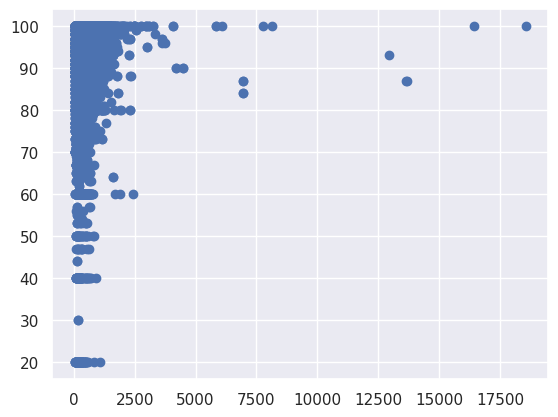

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
x = df['Price']
y = df['Guest Satisfaction']
plt.scatter(x,y)
plt.show()

In [13]:
#@title **code** some metrics

def tpr(est,X,y):
    p = est.predict(X)
    return np.mean (p[y==1] == y[y==1])

def tnr(est,X,y):
    p = est.predict(X)
    return np.mean(p[y==0] == y[y==0])

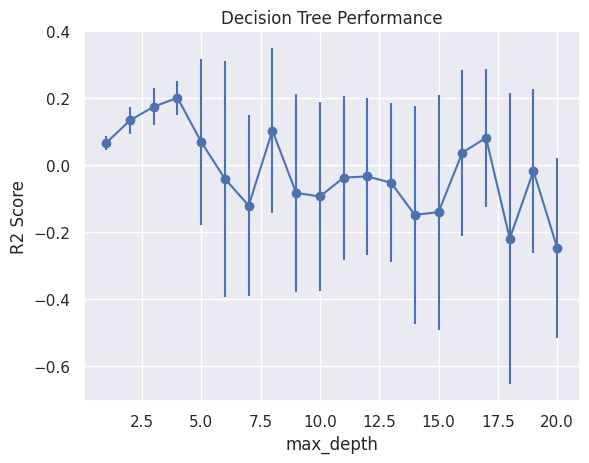

Mejor valor de max_depth: 4
Score correspondiente: 0.20173739861722045


In [14]:
#@title Tuneo del estimador Decision Tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor

# Obtener las características y variable objetivo
X = df.drop(['Price'], axis=1)  # Características
y = df['Price']  # Variable objetivo

# Realizar codificación one-hot de las características categóricas utilizando pandas
X_encoded = pd.get_dummies(X, drop_first=True)

# Realizar train-test split en las características y variable objetivo
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Definir una lista de valores para el parámetro max_depth
max_depth_values = range(1, 21)

# Crear listas para almacenar los resultados de los scores de validación cruzada
mean_scores = []
std_scores = []

# Iterar sobre los valores de max_depth
for max_depth in max_depth_values:
    # Crear una instancia del modelo DecisionTreeRegressor con el valor actual de max_depth
    dt = DecisionTreeRegressor(max_depth=max_depth)

    # Realizar validación cruzada con 5 folds y calcular el score de R2
    scores = cross_val_score(dt, X_train, y_train, cv=5, scoring='r2')

    # Almacenar el promedio y desviación estándar de los scores
    mean_scores.append(scores.mean())
    std_scores.append(scores.std())

# Graficar los resultados
plt.errorbar(max_depth_values, mean_scores, yerr=std_scores, fmt='-o')
plt.xlabel('max_depth')
plt.ylabel('R2 Score')
plt.title('Decision Tree Performance')
plt.grid(True)
plt.show()

# Encontrar el índice del mejor valor de max_depth
best_index = np.argmax(mean_scores)

# Obtener el mejor valor de max_depth y su score correspondiente
best_max_depth = max_depth_values[best_index]
best_score = mean_scores[best_index]

# Imprimir el mejor valor de max_depth y su score correspondiente
print(f"Mejor valor de max_depth: {best_max_depth}")
print(f"Score correspondiente: {best_score}")

# Crear una nueva instancia del modelo DecisionTreeRegressor con el mejor max_depth
best_dt = DecisionTreeRegressor(max_depth=best_max_depth)

# Ajustar el modelo utilizando los datos de entrenamiento
best_dt.fit(X_train, y_train)

# Realizar predicciones en los datos de prueba
predictions = best_dt.predict(X_test)




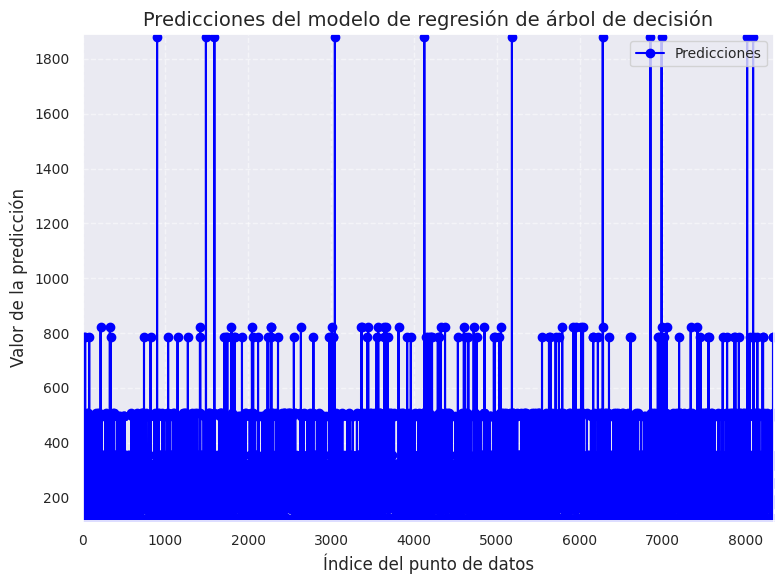

In [15]:
#@title Grafico de las predicciones

import matplotlib.pyplot as plt

# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(8, 6))

# Crear una lista de índices para los puntos de datos
indices = range(len(predictions))

# Graficar las predicciones
ax.plot(indices, predictions, label='Predicciones', marker='o', color='blue')

# Configurar etiquetas y título del gráfico
ax.set_xlabel('Índice del punto de datos', fontsize=12)
ax.set_ylabel('Valor de la predicción', fontsize=12)
ax.set_title('Predicciones del modelo de regresión de árbol de decisión', fontsize=14)

# Configurar límites de los ejes
ax.set_xlim(0, len(predictions))
ax.set_ylim(min(predictions) - 10, max(predictions) + 10)

# Configurar ticks de los ejes
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)

# Agregar una rejilla
ax.grid(True, linestyle='--', alpha=0.5)

# Mostrar la leyenda
ax.legend(fontsize=10)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


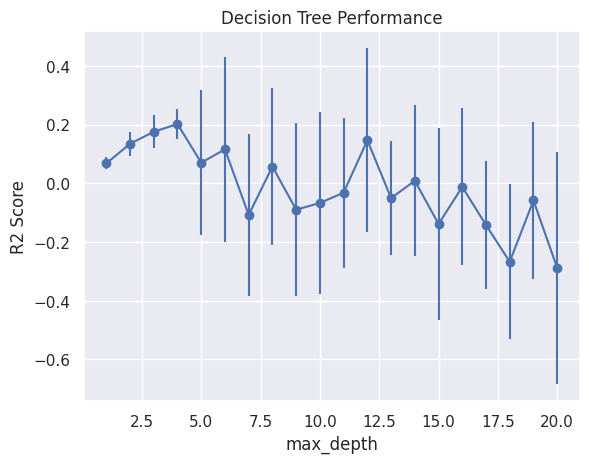

Mejor valor de max_depth: 4
Score correspondiente: 0.20173739861722045


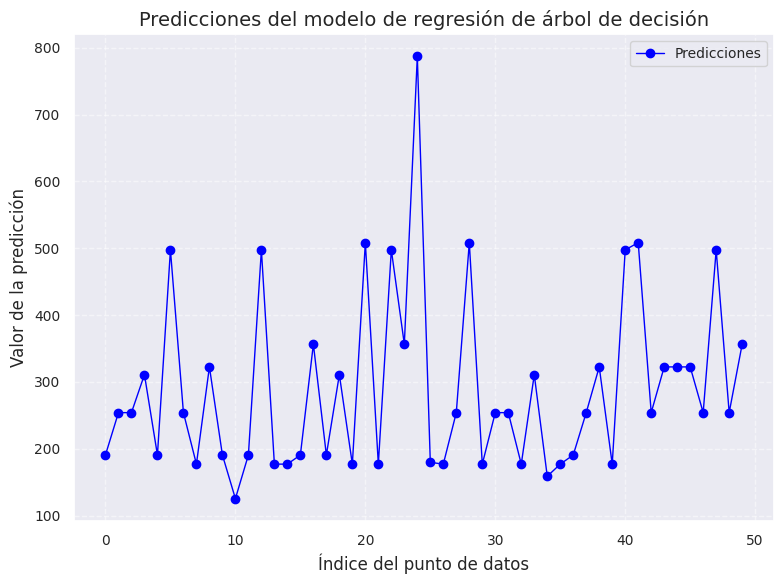

In [16]:
#@title Mejoramiento del grafico de predicciones

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor

# Obtener las características y variable objetivo
X = df.drop(['Price'], axis=1)  # Características
y = df['Price']  # Variable objetivo

# Realizar codificación one-hot de las características categóricas utilizando pandas
X_encoded = pd.get_dummies(X, drop_first=True)

# Realizar train-test split en las características y variable objetivo
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Definir una lista de valores para el parámetro max_depth
max_depth_values = range(1, 21)

# Crear listas para almacenar los resultados de los scores de validación cruzada
mean_scores = []
std_scores = []

# Iterar sobre los valores de max_depth
for max_depth in max_depth_values:
    # Crear una instancia del modelo DecisionTreeRegressor con el valor actual de max_depth
    dt = DecisionTreeRegressor(max_depth=max_depth)

    # Realizar validación cruzada con 5 folds y calcular el score de R2
    scores = cross_val_score(dt, X_train, y_train, cv=5, scoring='r2')

    # Almacenar el promedio y desviación estándar de los scores
    mean_scores.append(scores.mean())
    std_scores.append(scores.std())

# Graficar los resultados
plt.errorbar(max_depth_values, mean_scores, yerr=std_scores, fmt='-o')
plt.xlabel('max_depth')
plt.ylabel('R2 Score')
plt.title('Decision Tree Performance')
plt.grid(True)
plt.show()

# Encontrar el índice del mejor valor de max_depth
best_index = np.argmax(mean_scores)

# Obtener el mejor valor de max_depth y su score correspondiente
best_max_depth = max_depth_values[best_index]
best_score = mean_scores[best_index]

# Imprimir el mejor valor de max_depth y su score correspondiente
print(f"Mejor valor de max_depth: {best_max_depth}")
print(f"Score correspondiente: {best_score}")

# Crear una nueva instancia del modelo DecisionTreeRegressor con el mejor max_depth
best_dt = DecisionTreeRegressor(max_depth=best_max_depth)

# Ajustar el modelo utilizando los datos de entrenamiento
best_dt.fit(X_train, y_train)

# Realizar predicciones en un subconjunto de los datos de prueba
subset_size = 50
subset_indices = np.random.choice(len(X_test), size=subset_size, replace=False)
subset_predictions = best_dt.predict(X_test.iloc[subset_indices])

# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(8, 6))

# Crear una lista de índices para los puntos de datos
indices = range(subset_size)

# Graficar las predicciones
ax.plot(indices, subset_predictions, marker='o', color='blue', linewidth=1)

# Configurar etiquetas y título del gráfico
ax.set_xlabel('Índice del punto de datos', fontsize=12)
ax.set_ylabel('Valor de la predicción', fontsize=12)
ax.set_title('Predicciones del modelo de regresión de árbol de decisión', fontsize=14)

# Configurar ticks de los ejes
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)

# Agregar una rejilla
ax.grid(True, linestyle='--', alpha=0.5)

# Mostrar la leyenda
ax.legend(['Predicciones'], fontsize=10)

# Ajustar el espaciado de los subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()


# Random forest

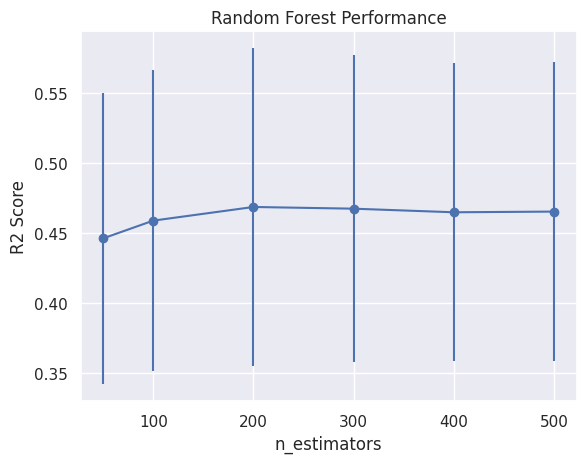

Mejor valor de n_estimators: 200
Score correspondiente: 0.46884945883824336
Predicciones:
[135.54020837 115.52965656 229.3030722  ... 201.26715451 319.40390488
 169.80659867]


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor

# Obtener las características y variable objetivo
X = df.drop(['Price'], axis=1)  # Características
y = df['Price']  # Variable objetivo

# Realizar codificación one-hot de las características categóricas utilizando pandas
X_encoded = pd.get_dummies(X, drop_first=True)

# Realizar train-test split en las características y variable objetivo
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Definir una lista de valores para el parámetro n_estimators
n_estimators_values = [50, 100, 200, 300, 400, 500]

# Crear listas para almacenar los resultados de los scores de validación cruzada
mean_scores = []
std_scores = []

# Iterar sobre los valores de n_estimators
for n_estimators in n_estimators_values:
    # Crear una instancia del modelo RandomForestRegressor con el valor actual de n_estimators
    rf = RandomForestRegressor(n_estimators=n_estimators, random_state=42)

    # Realizar validación cruzada con 5 folds y calcular el score de R2
    scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='r2')

    # Almacenar el promedio y desviación estándar de los scores
    mean_scores.append(scores.mean())
    std_scores.append(scores.std())

# Graficar los resultados
plt.errorbar(n_estimators_values, mean_scores, yerr=std_scores, fmt='-o')
plt.xlabel('n_estimators')
plt.ylabel('R2 Score')
plt.title('Random Forest Performance')
plt.grid(True)
plt.show()

# Encontrar el índice del mejor valor de n_estimators
best_index = np.argmax(mean_scores)

# Obtener el mejor valor de n_estimators y su score correspondiente
best_n_estimators = n_estimators_values[best_index]
best_score = mean_scores[best_index]

# Imprimir el mejor valor de n_estimators y su score correspondiente
print(f"Mejor valor de n_estimators: {best_n_estimators}")
print(f"Score correspondiente: {best_score}")

# Crear una nueva instancia del modelo RandomForestRegressor con el mejor n_estimators
best_rf = RandomForestRegressor(n_estimators=best_n_estimators, random_state=42)

# Ajustar el modelo utilizando los datos de entrenamiento
best_rf.fit(X_train, y_train)

# Realizar predicciones en los datos de prueba
predictions = best_rf.predict(X_test)

# Imprimir los resultados de las predicciones
print("Predicciones:")
print(predictions)

        City       Price      Day     Room Type  Shared Room  Private Room  \
0  Amsterdam  194.033698  Weekday  Private room        False          True   
1  Amsterdam  344.245776  Weekday  Private room        False          True   
2  Amsterdam  264.101422  Weekday  Private room        False          True   
3  Amsterdam  433.529398  Weekday  Private room        False          True   
4  Amsterdam  485.552926  Weekday  Private room        False          True   

   Person Capacity  Superhost  Multiple Rooms  Business  Cleanliness Rating  \
0              2.0      False               1         0                10.0   
1              4.0      False               0         0                 8.0   
2              2.0      False               0         1                 9.0   
3              4.0      False               0         1                 9.0   
4              2.0       True               0         0                10.0   

   Guest Satisfaction  Bedrooms  City Center (km)  Metro

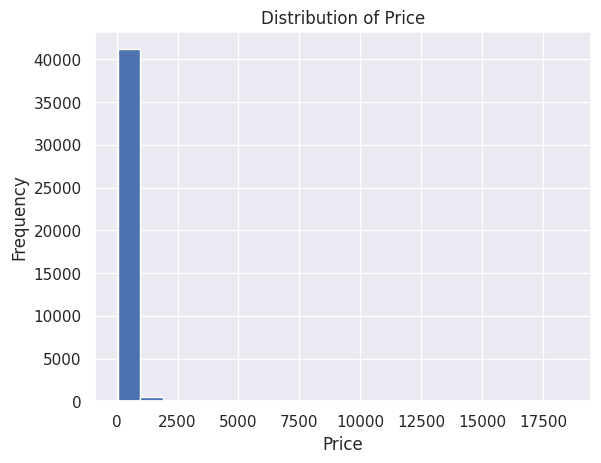

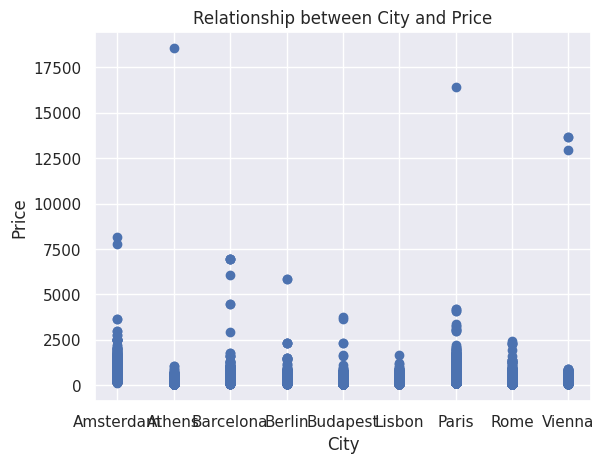

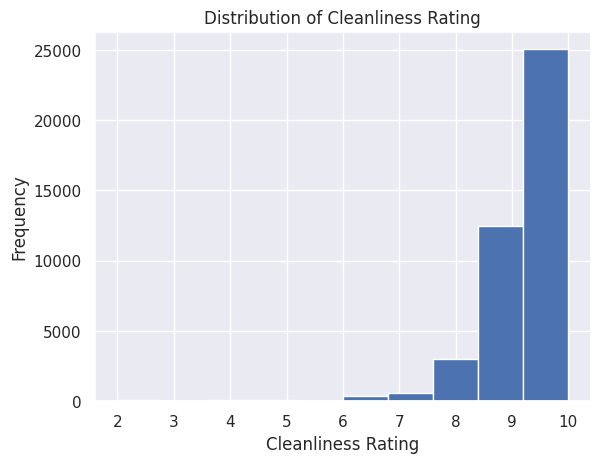

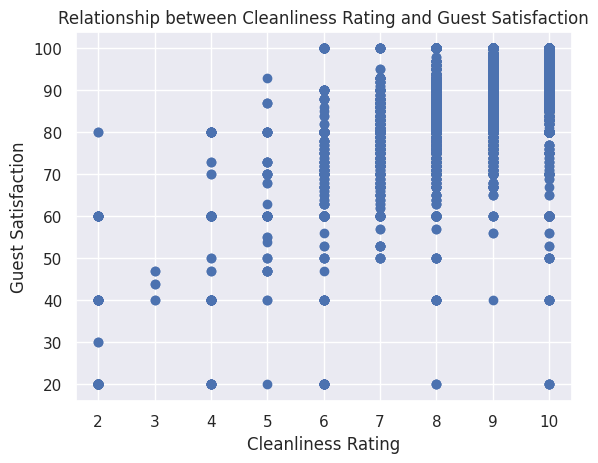

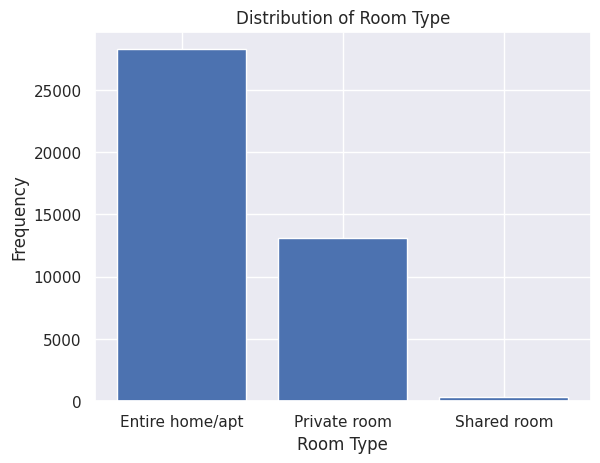

In [18]:
#@title **Analisis exploratorio**

# Mostrar las primeras filas del DataFrame
print(df.head())

# Obtener información general del DataFrame
print(df.info())

# Calcular estadísticas descriptivas de las variables numéricas
print(df.describe())

# Visualizar la distribución de la variable 'Price'
plt.hist(df['Price'], bins=20)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Price')
plt.show()

# Visualizar la relación entre la variable 'Price' y 'City'
plt.scatter(df['City'], df['Price'])
plt.xlabel('City')
plt.ylabel('Price')
plt.title('Relationship between City and Price')
plt.show()

# Visualizar la distribución de la variable 'Cleanliness Rating'
plt.hist(df['Cleanliness Rating'], bins=10)
plt.xlabel('Cleanliness Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Cleanliness Rating')
plt.show()

# Visualizar la relación entre la variable 'Cleanliness Rating' y 'Guest Satisfaction'
plt.scatter(df['Cleanliness Rating'], df['Guest Satisfaction'])
plt.xlabel('Cleanliness Rating')
plt.ylabel('Guest Satisfaction')
plt.title('Relationship between Cleanliness Rating and Guest Satisfaction')
plt.show()

# Visualizar la distribución de la variable categórica 'Room Type'
plt.bar(df['Room Type'].value_counts().index, df['Room Type'].value_counts().values)
plt.xlabel('Room Type')
plt.ylabel('Frequency')
plt.title('Distribution of Room Type')
plt.show()

# Aprendizaje no supervisado K-means

Aprendizaje no supervisado.
Agglomerative Clustering vs K-means


In [19]:
customer_data =  df[['Price', 'City Center (km)', 'Cleanliness Rating', 'Bedrooms']]

data = customer_data.iloc[:,:].values
data.shape
customer_data.head(3)

,Price,City Center (km),Cleanliness Rating,Bedrooms
0,194.033698,5.022964,10.0,1
1,344.245776,0.488389,8.0,1
2,264.101422,5.748312,9.0,1


In [20]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [21]:
DBS = DBSCAN(eps=3)
AgglomerativeClustering(n_clusters=3, linkage= "ward")
DBS.fit(data)

DBSCAN(eps=3)

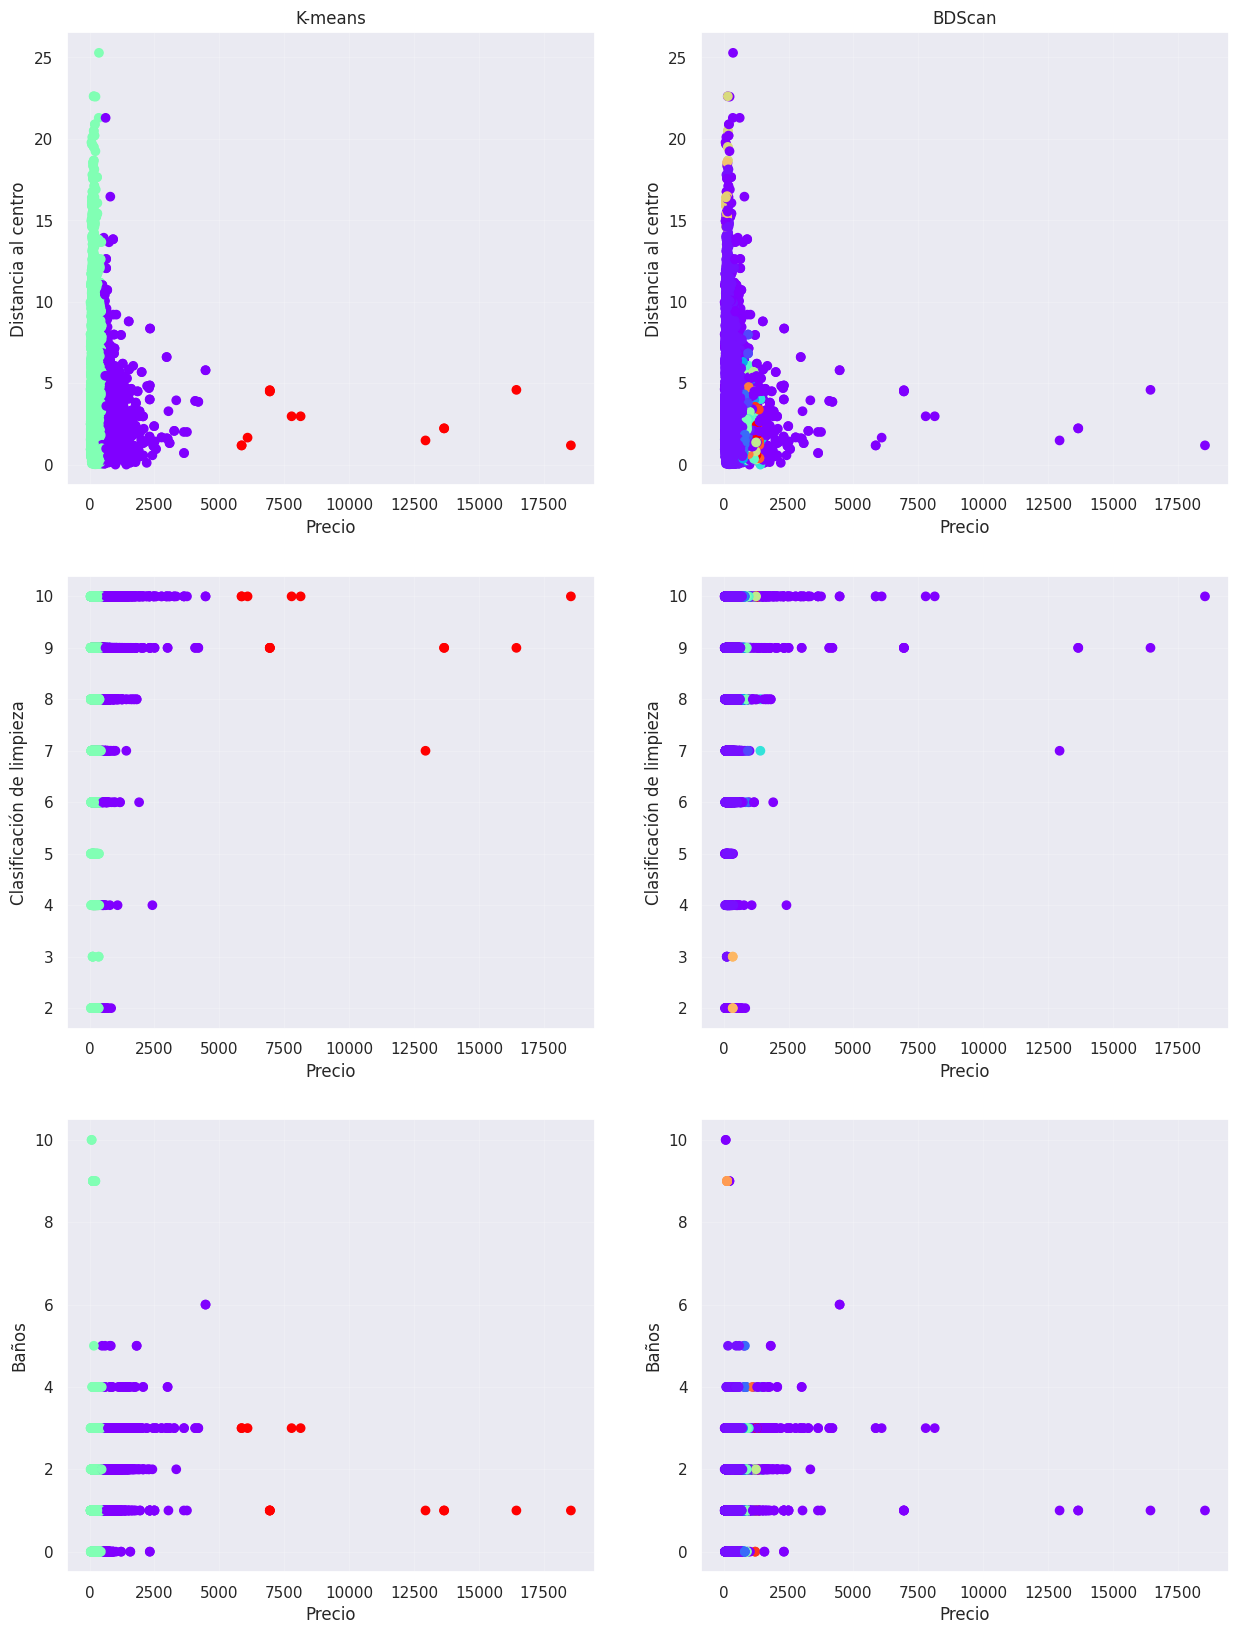

In [22]:
plt.figure(figsize=(15, 20))

#precio  -  Distancia al centro de la ciudad
plt.subplot(321)
plt.scatter(data[:,0], data[:,1], c=kmeans.labels_, cmap='rainbow')
plt.title("K-means")
plt.xlabel("Precio")
plt.ylabel("Distancia al centro")
plt.grid(alpha=0.2)

plt.subplot(322)
plt.scatter(data[:,0], data[:,1], c=DBS.labels_, cmap='rainbow')
plt.title("BDScan")
plt.xlabel("Precio")
plt.ylabel("Distancia al centro")
plt.grid(alpha=0.2)

#precio  -  Clasificación de limpieza
plt.subplot(323)
plt.scatter(data[:,0], data[:,2], c=kmeans.labels_, cmap='rainbow')
plt.xlabel("Precio")
plt.ylabel("Clasificación de limpieza")
plt.grid(alpha=0.2)

plt.subplot(324)
plt.scatter(data[:,0], data[:,2], c=DBS.labels_, cmap='rainbow')
plt.xlabel("Precio")
plt.ylabel("Clasificación de limpieza")
plt.grid(alpha=0.2)

#precio  -  Baños
plt.subplot(325)
plt.scatter(data[:,0], data[:,3], c=kmeans.labels_, cmap='rainbow')
plt.xlabel("Precio")
plt.ylabel("Baños")
plt.grid(alpha=0.2)

plt.subplot(326)
plt.scatter(data[:,0], data[:,3], c=DBS.labels_, cmap='rainbow')
plt.xlabel("Precio")
plt.ylabel("Baños")
plt.grid(alpha=0.2)

**conclusiones:**

Para este proyecto decidimos clasificar las habitaciones en 3 niveles (bajo, medio, alto) de rentabilidad, siendo la "calidad-precio" el criterio de clasificacion, por lo que decidimos relacionar distintas caracteristicas con el precio de las habitaciones, estas fueron:

1.   Price
2.   City Center (km)
3.   Cleanliness Rating
4.   Bedrooms

Para el caso de este analisis el metodo *K-means* es mas eficaz a la hora de clasificar las habitaciones, esto se debe a que los datos estan bastante agrupados, por lo que k-means define mejor los limites de cada nivel de rentabilidad.

#Mejoramiento del tuneo por medio de un grid

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Obtener las características y variable objetivo
X = df.drop(['Price'], axis=1)  # Características
y = df['Price']  # Variable objetivo

# Realizar codificación one-hot de las características categóricas utilizando pandas
X_encoded = pd.get_dummies(X, drop_first=True)

# Realizar train-test split en las características y variable objetivo
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Definir los valores para los hiperparámetros que deseas ajustar
param_grid = {
    'n_estimators': [50, 100, 200, 300, 400, 500],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Crear una instancia del modelo RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Realizar Grid Search con los hiperparámetros y 5 folds de validación cruzada
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='r2')

# Ajustar Grid Search en los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo y sus hiperparámetros
best_rf = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Imprimir los resultados
print("Mejores hiperparámetros:", best_params)
print("Mejor score:", best_score)

# Ajustar el modelo utilizando los datos de entrenamiento
best_rf.fit(X_train, y_train)

# Realizar predicciones en los datos de prueba
predictions = best_rf.predict(X_test)

# Imprimir los resultados de las predicciones
print("Predicciones:")
print(predictions)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Obtener las características y variable objetivo
X = df.drop(['Price'], axis=1)  # Características
y = df['Price']  # Variable objetivo

# Realizar codificación one-hot de las características categóricas utilizando pandas
X_encoded = pd.get_dummies(X, drop_first=True)

# Realizar train-test split en las características y variable objetivo
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Crear una nueva instancia del modelo RandomForestRegressor con los mejores hiperparámetros
best_rf = RandomForestRegressor(n_estimators=200, max_depth=None, min_samples_split=2, random_state=42)

# Ajustar el modelo utilizando los datos de entrenamiento
best_rf.fit(X_train, y_train)

# Realizar predicciones en los datos de prueba
predictions = best_rf.predict(X_test)

# Calcular el score de R2 en los datos de prueba
r2_score = best_rf.score(X_test, y_test)

# Imprimir los resultados de las predicciones y el score de R2
print("Predicciones:")
print(predictions)
print(f"R2 Score: {r2_score}")